In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357294 sha256=bbd73e9d57172cf9efb4276fc9b32c4b7267336aa34a266462995648de94dd7d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Install necessary libraries if not already installed
# !pip install pandas numpy scikit-learn matplotlib seaborn surprise

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
# Load the dataset
df = pd.read_csv('/content/purchase_data_exe.csv')

# Preview the dataset
print(df.head())

# Drop any null values
df.dropna(inplace=True)


         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  


In [ ]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

# Step 2: Load the Dataset
# Replace 'online_retail.csv' with the actual path to your dataset file
data = pd.read_csv('/content/purchase_data_exe.csv')

# Step 3: Data Preprocessing
# Display the first few rows of the dataset to understand its structure
print(data.head())

# Select relevant columns and drop any rows with missing values in those columns
data = data[['date', 'customer_id', 'product_category', 'payment_method', 'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']].dropna()

# Convert 'date' to datetime format if necessary
data['date'] = pd.to_datetime(data['date'])

# Step 4: Create a User-Item Interaction Matrix for Collaborative Filtering
user_item_matrix = data.pivot_table(index='customer_id', columns='product_category', values='value [USD]', aggfunc='sum').fillna(0)

# Convert the user-item matrix to a format suitable for Surprise library
reader = Reader(rating_scale=(0, user_item_matrix.values.max()))
data_surprise = Dataset.load_from_df(data[['customer_id', 'product_category', 'value [USD]']], reader)

# Step 5: Train-Test Split for Surprise Library
trainset, testset = surprise_train_test_split(data_surprise, test_size=0.2)

# Step 6: Train the SVD Model (Collaborative Filtering)
model = SVD()
model.fit(trainset)

# Step 7: Make Predictions and Evaluate the Model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.2f}')

# Step 8: Generate Recommendations for a Specific Customer
def get_recommendations(customer_id, num_recommendations=5):
    # Get all product categories
    all_products = user_item_matrix.columns.tolist()

    # Predict ratings for all products for the given customer
    customer_predictions = []

    for product in all_products:
        pred_rating = model.predict(customer_id, product).est
        customer_predictions.append((product, pred_rating))

    # Sort predictions by rating and return the top N recommendations
    customer_predictions.sort(key=lambda x: x[1], reverse=True)
    return customer_predictions[:num_recommendations]

# Example usage of get_recommendations function
customer_id_example = data['customer_id'].unique()[0]  # Replace with an actual customer ID from your dataset
recommendations = get_recommendations(customer_id_example)
print(f'Recommendations for Customer ID {customer_id_example}:')
for product, rating in recommendations:
    print(f'Product Category: {product}, Predicted Value [USD]: {rating:.2f}')

# Optional: Save recommendations to CSV file if needed
recommendation_df = pd.DataFrame(recommendations, columns=['Product Category', 'Predicted Value [USD]'])
recommendation_df.to_csv('recommendations.csv', index=False)
print("Recommendations saved to recommendations.csv")

         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  


<ipython-input-9-401d9815713d>:23: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


RMSE: 1983.4214
RMSE: 1983.42
Recommendations for Customer ID 37077:
Product Category: 501, Predicted Value [USD]: 2177.04
Product Category: 502, Predicted Value [USD]: 2177.04
Product Category: 503, Predicted Value [USD]: 2177.04
Product Category: 504, Predicted Value [USD]: 2177.04
Product Category: 505, Predicted Value [USD]: 2177.04
Recommendations saved to recommendations.csv


In [ ]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Set visual style
sns.set(style="whitegrid")

# Step 2: Load the Dataset
# Replace 'online_retail.csv' with the actual path to your dataset file
data = pd.read_csv('/content/purchase_data_exe.csv')

# Step 3: Data Preprocessing
# Convert 'date' to datetime format with dayfirst=True if necessary
data['date'] = pd.to_datetime(data['date'], dayfirst=True)  # Adjust based on your date format

# Select relevant columns and drop any rows with missing values in those columns
data = data[['date', 'customer_id', 'product_category', 'payment_method', 'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']].dropna()

# Check for any remaining missing values after filtering
print(f"Remaining missing values: {data.isnull().sum()}")

# Step 4: Create a User-Item Interaction Matrix for Collaborative Filtering
user_item_matrix = data.pivot_table(index='customer_id', columns='product_category', values='value [USD]', aggfunc='sum').fillna(0)

# Convert the user-item matrix to a format suitable for Surprise library
reader = Reader(rating_scale=(0, user_item_matrix.values.max()))
data_surprise = Dataset.load_from_df(data[['customer_id', 'product_category', 'value [USD]']], reader)

# Step 5: Train-Test Split for Surprise Library
trainset, testset = train_test_split(data_surprise, test_size=0.2)

# Step 6: Train the SVD Model (Collaborative Filtering)
model = SVD()
model.fit(trainset)

# Step 7: Make Predictions and Evaluate the Model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.2f}')

# Step 8: Visualize Recommendations

# Create a DataFrame of predictions for visualization
try:
    pred_df = pd.DataFrame(predictions, columns=['user_id', 'item_id', 'true_rating', 'predicted_rating'])
except Exception as e:
    print("Error creating DataFrame from predictions:", e)
    print("Predictions object:", predictions)  # Inspect predictions object

# Check if pred_df has been created successfully before proceeding
if 'pred_df' in locals():
    top_recommendations = pred_df.groupby('user_id').apply(lambda x: x.nlargest(5, 'predicted_rating')).reset_index(drop=True)

    # Plotting top recommendations for each user
    plt.figure(figsize=(12, 6))
    sns.barplot(x='item_id', y='predicted_rating', hue='user_id', data=top_recommendations)
    plt.title('Top Recommendations per User')
    plt.xlabel('Product Category')
    plt.ylabel('Predicted Value [USD]')
    plt.xticks(rotation=45)
    plt.legend(title='User ID')
    plt.tight_layout()
    plt.show()

# Step 9: Generate Recommendations for a Specific Customer
def get_recommendations(customer_id, num_recommendations=5):
    # Get all product categories
    all_products = user_item_matrix.columns.tolist()

    # Predict ratings for all products for the given customer
    customer_predictions = []

    for product in all_products:
        pred_rating = model.predict(customer_id, product).est
        customer_predictions.append((product, pred_rating))

    # Sort predictions by rating and return the top N recommendations
    customer_predictions.sort(key=lambda x: x[1], reverse=True)
    return customer_predictions[:num_recommendations]

# Example usage of get_recommendations function
customer_id_example = data['customer_id'].unique()[0]  # Replace with an actual customer ID from your dataset
recommendations = get_recommendations(customer_id_example)
print(f'Recommendations for Customer ID {customer_id_example}:')
for product, rating in recommendations:
    print(f'Product Category: {product}, Predicted Value [USD]: {rating:.2f}')

# Optional: Save recommendations to CSV file if needed
recommendation_df = pd.DataFrame(recommendations, columns=['Product Category', 'Predicted Value [USD]'])
recommendation_df.to_csv('recommendations.csv', index=False)
print("Recommendations saved to recommendations.csv")

Remaining missing values: date                      0
customer_id               0
product_category          0
payment_method            0
value [USD]               0
time_on_site [Minutes]    0
clicks_in_site            0
dtype: int64
RMSE: 1982.2065
RMSE: 1982.21
Error creating DataFrame from predictions: 4 columns passed, passed data had 5 columns
Predictions object: [Prediction(uid=43249, iid=515, r_ui=455.42, est=2177.04, details={'was_impossible': False}), Prediction(uid=28155, iid=505, r_ui=132.98, est=2177.04, details={'was_impossible': False}), Prediction(uid=47429, iid=504, r_ui=31.02, est=2177.04, details={'was_impossible': False}), Prediction(uid=28778, iid=515, r_ui=229.15, est=2177.04, details={'was_impossible': False}), Prediction(uid=15000, iid=512, r_ui=30.92, est=2177.04, details={'was_impossible': False}), Prediction(uid=35228, iid=512, r_ui=252.34, est=2177.04, details={'was_impossible': False}), Prediction(uid=44693, iid=511, r_ui=132.97, est=2177.04, details={'was_

In [ ]:
data = pd.read_csv('/content/walmart.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Import Libraries
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
df = pd.read_csv('/content/walmart.csv')

# Drop any null values
df.dropna(inplace=True)

# Preview the dataset
print(df.head())

# Collaborative Filtering (User-Product Interaction)
reader = Reader(rating_scale=(0, df['Purchase'].max()))
data = Dataset.load_from_df(df[['User_ID', 'Product_ID', 'Purchase']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Collaborative Filtering Model (KNN)
algo = KNNBasic()
algo.fit(trainset)

# Function to get recommendations
def get_recommendations(user_id, num_recommendations=5):
    # Get all product ids
    all_product_ids = df['Product_ID'].unique()

    # Get the products the user has already bought
    purchased_products = df[df['User_ID'] == user_id]['Product_ID'].tolist()

    # Predict ratings for all products the user hasn't bought
    recommendations = []
    for product_id in all_product_ids:
        if product_id not in purchased_products:
            prediction = algo.predict(user_id, product_id)
            recommendations.append((product_id, prediction.est))

    # Sort recommendations by predicted rating
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return top n recommendations
    return recommendations[:num_recommendations]

# Example usage
user_id = 1  # Replace with the customer ID you want to query
recommendations = get_recommendations(user_id)
print(f"Top Recommendations for User {user_id}:")
for product, score in recommendations:
    print(f"Product ID: {product}, Predicted Score: {score:.2f}")


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  
Computing the msd similarity matrix...
Done computing similarity matrix.
Top Recommendations for User 1:
Product ID: P00069042, Predicted Score: 9269.28
Product ID: 

Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Enter Customer ID to get recommendations: 52267

Recommended Product Categories based on clicks:
    product_category  clicks_in_site
4                505           33779
7                508  

<ipython-input-10-7f224f2d10ab>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


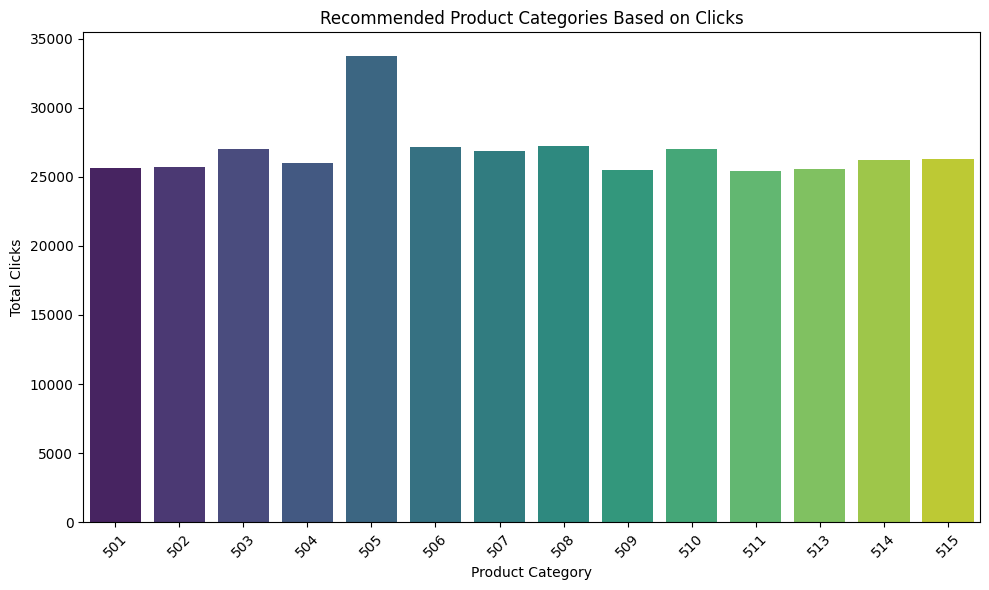

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


In [ ]:
!pip install prophet

Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Enter Customer ID to get recommendations and predictions: 44410

Recommended Product Categories based on clicks:
    product_category  clicks_in_site
2                505           33779
5     

<ipython-input-16-fd9456f2eb54>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


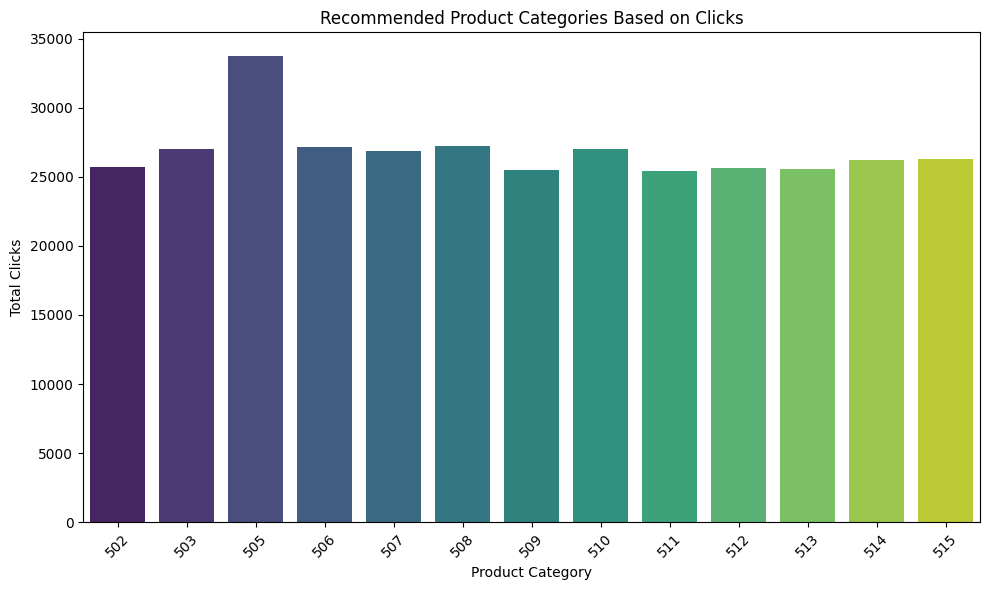

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


<Figure size 1000x600 with 0 Axes>

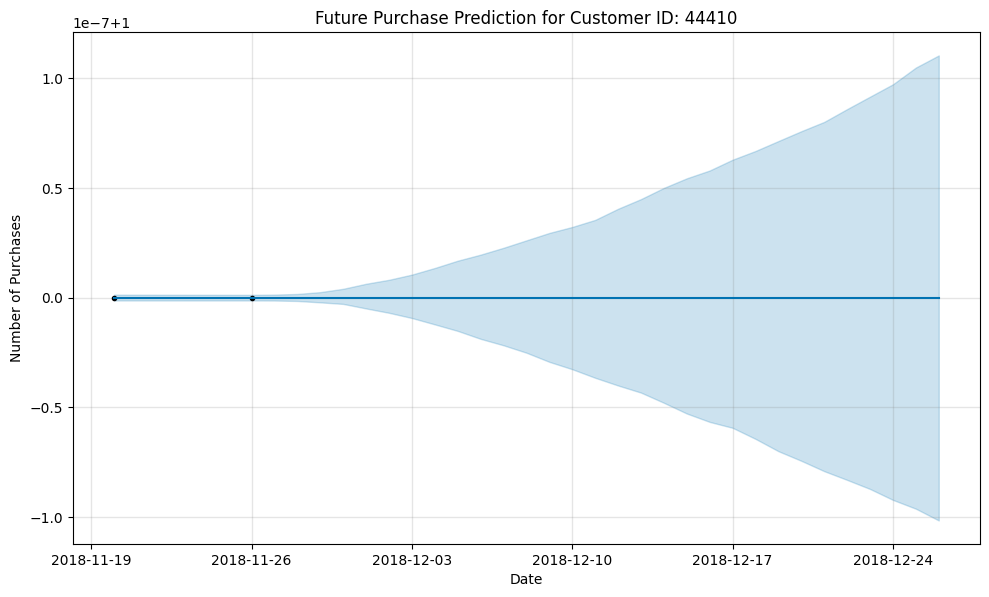

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # Updated import

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Prepare data for Prophet
    purchase_data = customer_data.groupby('date')['product_category'].count().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations and predictions: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)

        # Predict future purchases
        future_purchase_prediction(df, customer_id)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Columns in DataFrame:
Index(['date', 'customer_id', 'product_category', 'payment_method',
       'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site',
       'Unnamed: 7'],
      dtype='ob

<ipython-input-24-3d35e9b6ddbe>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


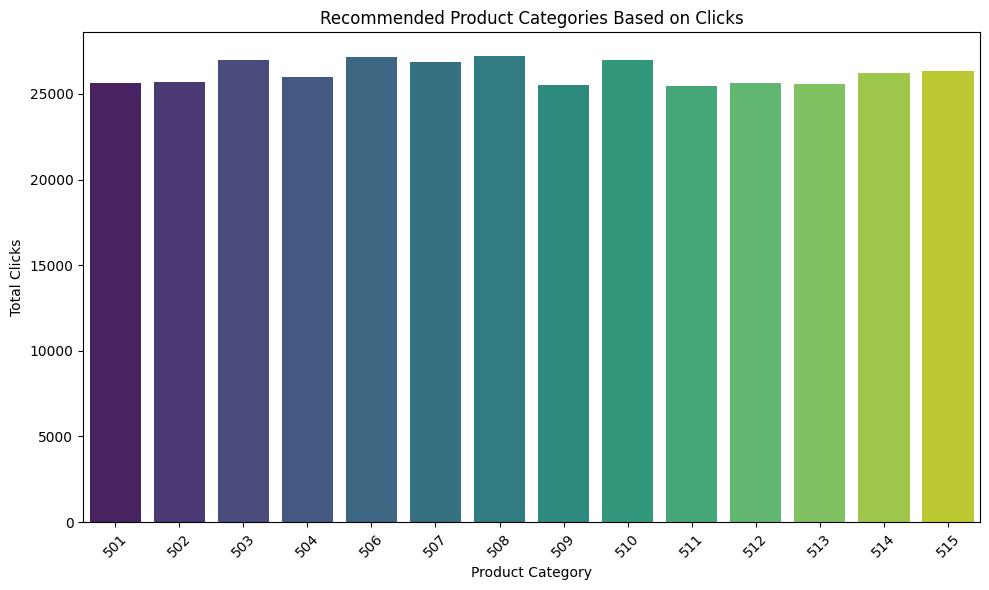

Not enough data to make predictions for Customer ID: 20719.
Estimated spending per minute for Customer ID 20719: $216.39


<ipython-input-24-3d35e9b6ddbe>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')


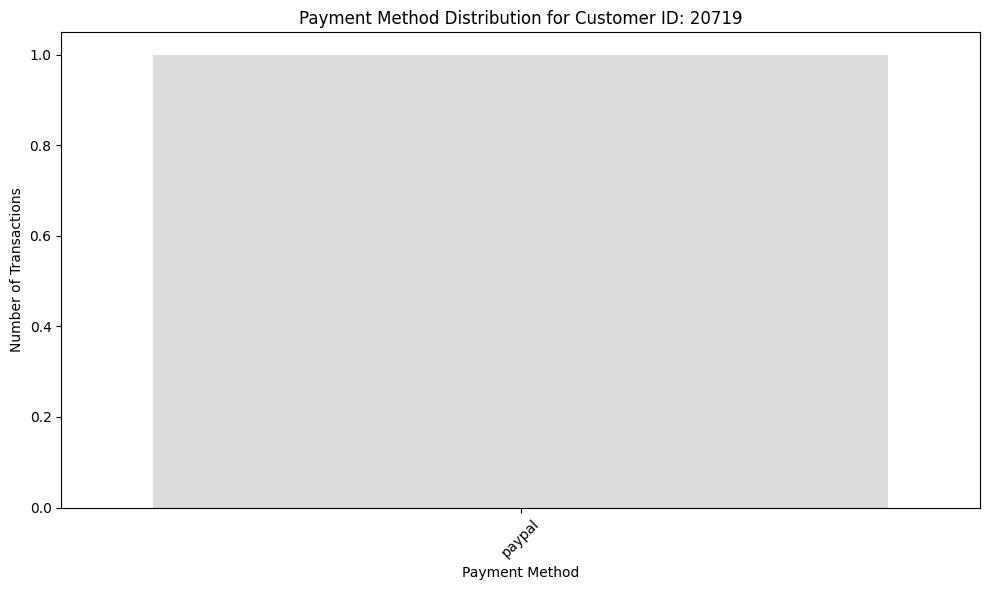

Consider targeting this customer with credit card ads.
Consider targeting this customer with PayPal ads.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # Updated import

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Inspect DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Prepare data for Prophet
    purchase_data = customer_data.groupby('date')['product_category'].count().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Check for valid data
    if purchase_data.shape[0] < 2:
        print(f"Not enough data to make predictions for Customer ID: {customer_id}.")
        return None

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

    return forecast  # Return the forecast data for further processing

def predict_spending(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Check if the required columns exist
    if 'value [USD]' not in df.columns or 'time_on_site [Minutes]' not in df.columns:
        print("Required columns 'value [USD]' or 'time_on_site [Minutes]' are missing in the DataFrame.")
        return None

    # Calculate total spending and time spent
    total_spending = customer_data['value [USD]'].sum()  # Using the correct column name
    total_time_on_site = customer_data['time_on_site [Minutes]'].sum()  # Using the correct column name

    # Average spending per minute on site
    average_spending_per_time = total_spending / (total_time_on_site / 60) if total_time_on_site > 0 else 0

    print(f"Estimated spending per minute for Customer ID {customer_id}: ${average_spending_per_time:.2f}")
    return average_spending_per_time

def analyze_payment_method(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Analyze payment methods used by the customer
    payment_methods = customer_data['payment_method'].value_counts()  # Assuming there is a 'payment_method' column

    # Plot payment method distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')
    plt.title(f'Payment Method Distribution for Customer ID: {customer_id}')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    credit_card_used = payment_methods.get('Credit Card', 0)
    paypal_used = payment_methods.get('PayPal', 0)

    # Determine if the customer might benefit from ads
    if credit_card_used == 0:
        print("Consider targeting this customer with credit card ads.")
    if paypal_used == 0:
        print("Consider targeting this customer with PayPal ads.")

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations and predictions: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)

        # Predict future purchases
        forecast = future_purchase_prediction(df, customer_id)

        # Add spending prediction
        estimated_spending = predict_spending(df, customer_id)

        # Analyze payment methods
        analyze_payment_method(df, customer_id)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Columns in DataFrame:
Index(['date', 'customer_id', 'product_category', 'payment_method',
       'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site',
       'Unnamed: 7'],
      dtype='ob

<ipython-input-25-beeb7ab98727>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


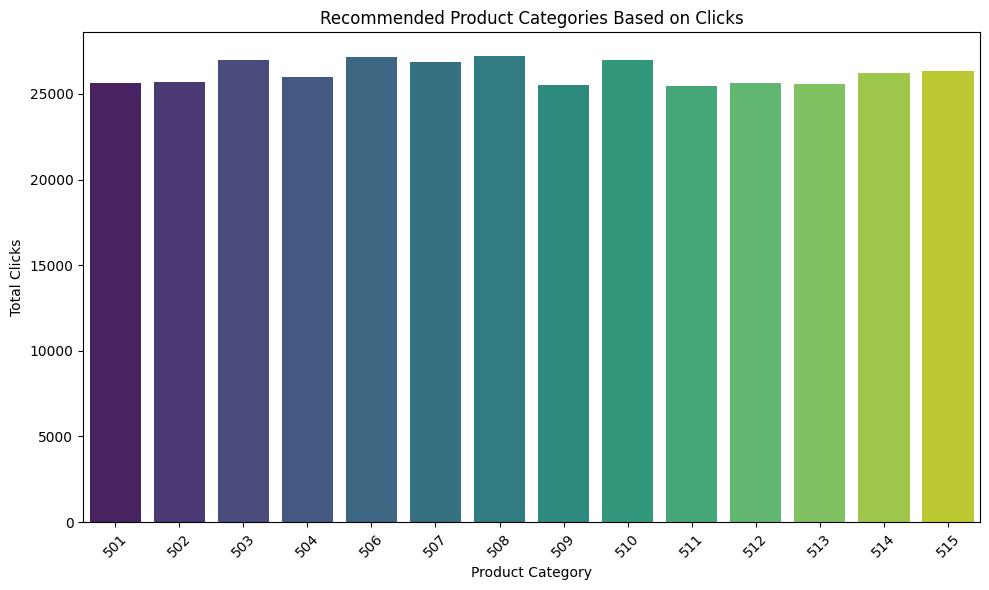

Not enough data to make predictions for Customer ID: 20719.
Estimated spending per minute for Customer ID 20719: $216.39
Payment methods counts for Customer ID 20719:
payment_method
paypal    1
Name: count, dtype: int64


<ipython-input-25-beeb7ab98727>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')


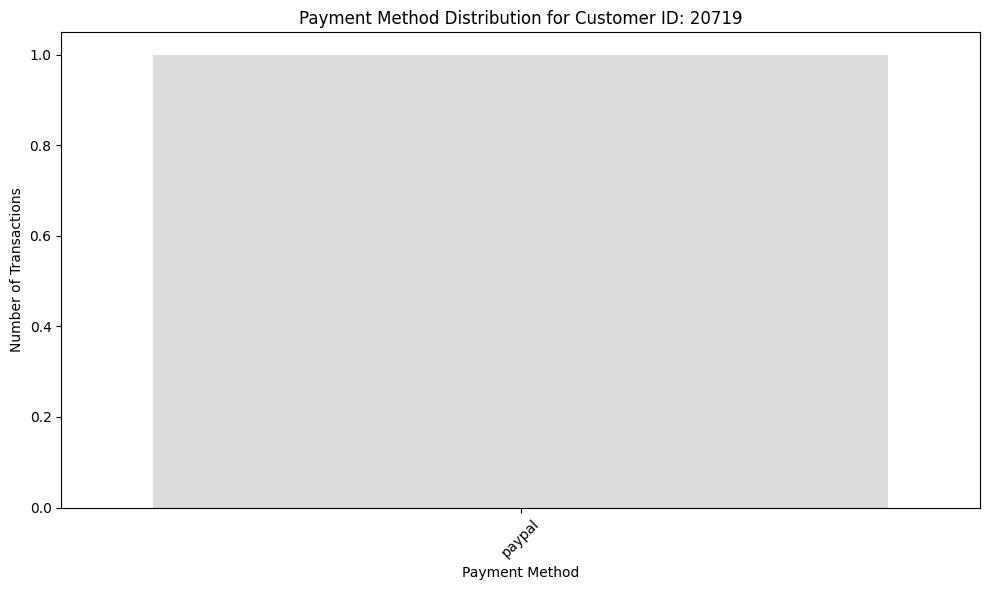

Consider targeting this customer with credit card ads.
Consider targeting this customer with PayPal ads.


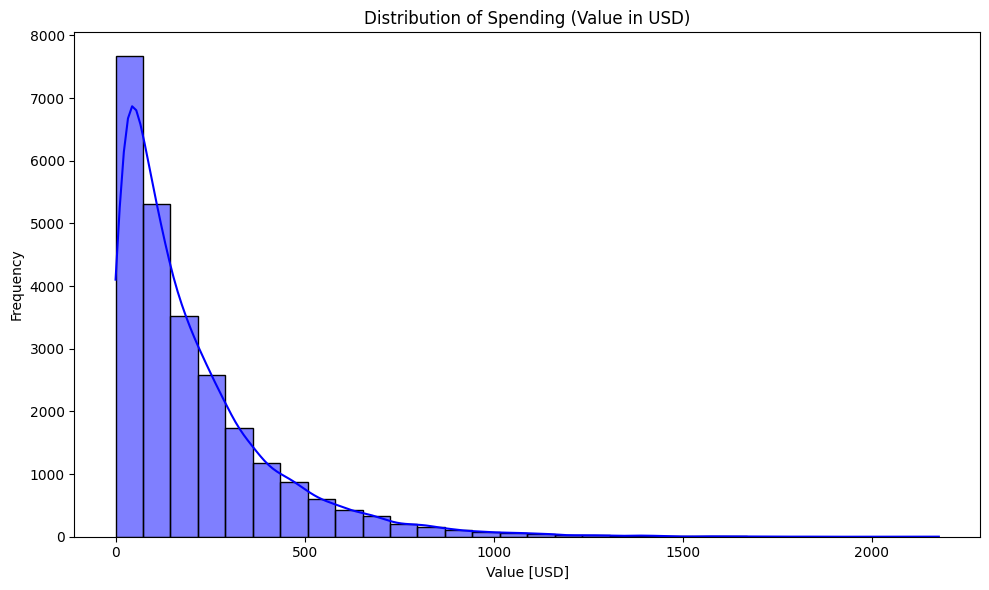

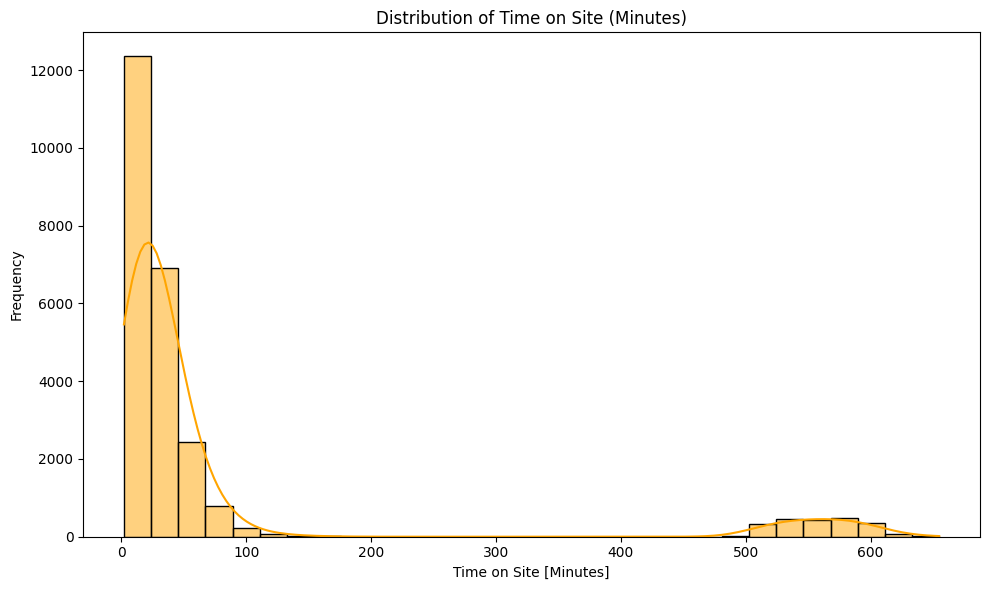

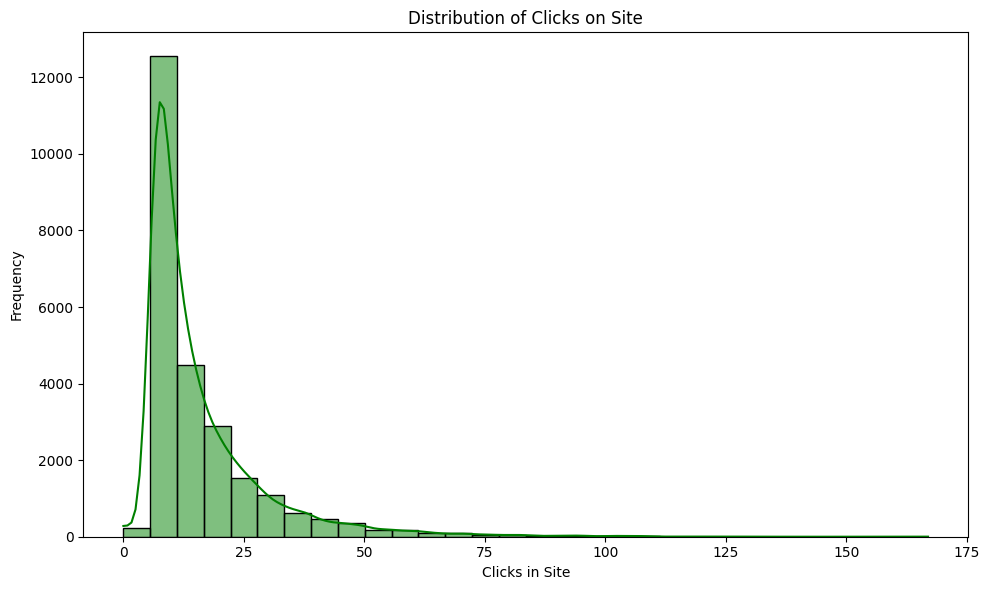

<ipython-input-25-beeb7ab98727>:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


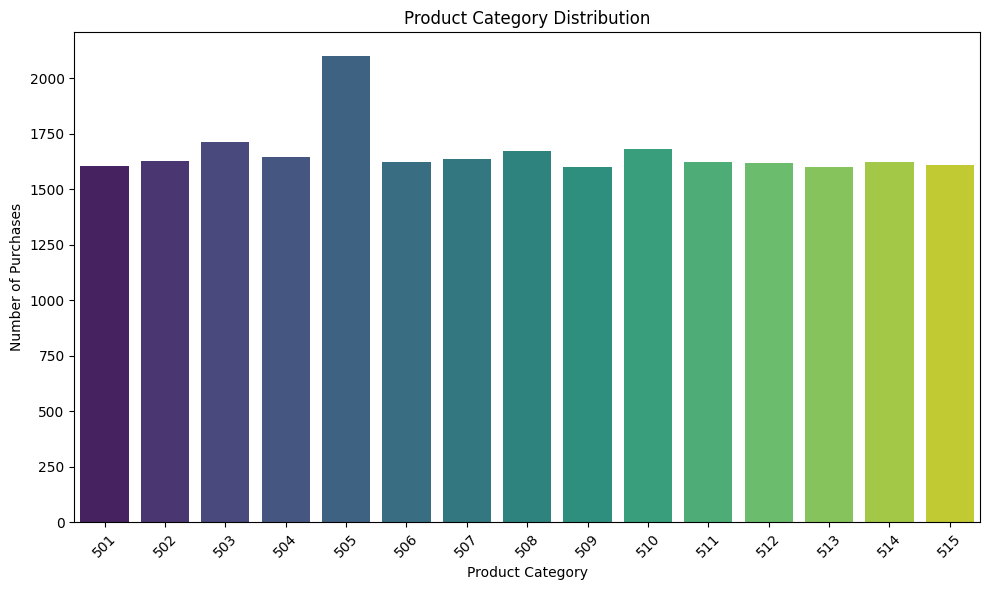

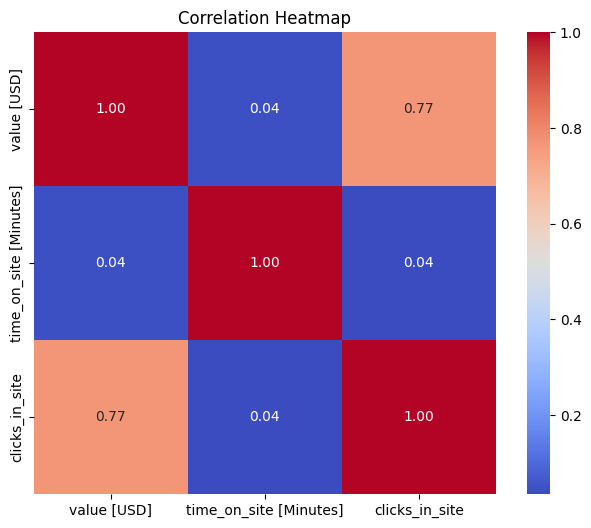

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # Updated import

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Inspect DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Prepare data for Prophet
    purchase_data = customer_data.groupby('date')['product_category'].count().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Check for valid data
    if purchase_data.shape[0] < 2:
        print(f"Not enough data to make predictions for Customer ID: {customer_id}.")
        return None

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

    return forecast  # Return the forecast data for further processing

def predict_spending(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Check if the required columns exist
    if 'value [USD]' not in df.columns or 'time_on_site [Minutes]' not in df.columns:
        print("Required columns 'value [USD]' or 'time_on_site [Minutes]' are missing in the DataFrame.")
        return None

    # Calculate total spending and time spent
    total_spending = customer_data['value [USD]'].sum()  # Using the correct column name
    total_time_on_site = customer_data['time_on_site [Minutes]'].sum()  # Using the correct column name

    # Average spending per minute on site
    average_spending_per_time = total_spending / (total_time_on_site / 60) if total_time_on_site > 0 else 0

    print(f"Estimated spending per minute for Customer ID {customer_id}: ${average_spending_per_time:.2f}")
    return average_spending_per_time

def analyze_payment_method(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Analyze payment methods used by the customer
    payment_methods = customer_data['payment_method'].value_counts()  # Assuming there is a 'payment_method' column

    # Print payment methods counts for debugging
    print(f"Payment methods counts for Customer ID {customer_id}:")
    print(payment_methods)

    if payment_methods.empty:
        print("No payment methods found for this customer.")
        return None

    # Plot payment method distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')
    plt.title(f'Payment Method Distribution for Customer ID: {customer_id}')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    credit_card_used = payment_methods.get('Credit Card', 0)
    paypal_used = payment_methods.get('PayPal', 0)

    # Determine if the customer might benefit from ads
    if credit_card_used == 0:
        print("Consider targeting this customer with credit card ads.")
    if paypal_used == 0:
        print("Consider targeting this customer with PayPal ads.")

# Additional Analysis Functions
def plot_value_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['value [USD]'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Spending (Value in USD)')
    plt.xlabel('Value [USD]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_time_on_site_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['time_on_site [Minutes]'], bins=30, kde=True, color='orange')
    plt.title('Distribution of Time on Site (Minutes)')
    plt.xlabel('Time on Site [Minutes]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_clicks_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['clicks_in_site'], bins=30, kde=True, color='green')
    plt.title('Distribution of Clicks on Site')
    plt.xlabel('Clicks in Site')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_product_category_distribution(df):
    category_counts = df['product_category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title('Product Category Distribution')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df[['value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']]
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations and predictions: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)

        # Predict future purchases
        forecast = future_purchase_prediction(df, customer_id)

        # Add spending prediction
        estimated_spending = predict_spending(df, customer_id)

        # Analyze payment methods
        analyze_payment_method(df, customer_id)

        # Additional Graphs
        plot_value_distribution(df)
        plot_time_on_site_distribution(df)
        plot_clicks_distribution(df)
        plot_product_category_distribution(df)
        plot_correlation_heatmap(df)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Columns in DataFrame:
Index(['date', 'customer_id', 'product_category', 'payment_method',
       'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site',
       'Unnamed: 7'],
      dtype='ob

<ipython-input-26-ffbbf7e5ec52>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


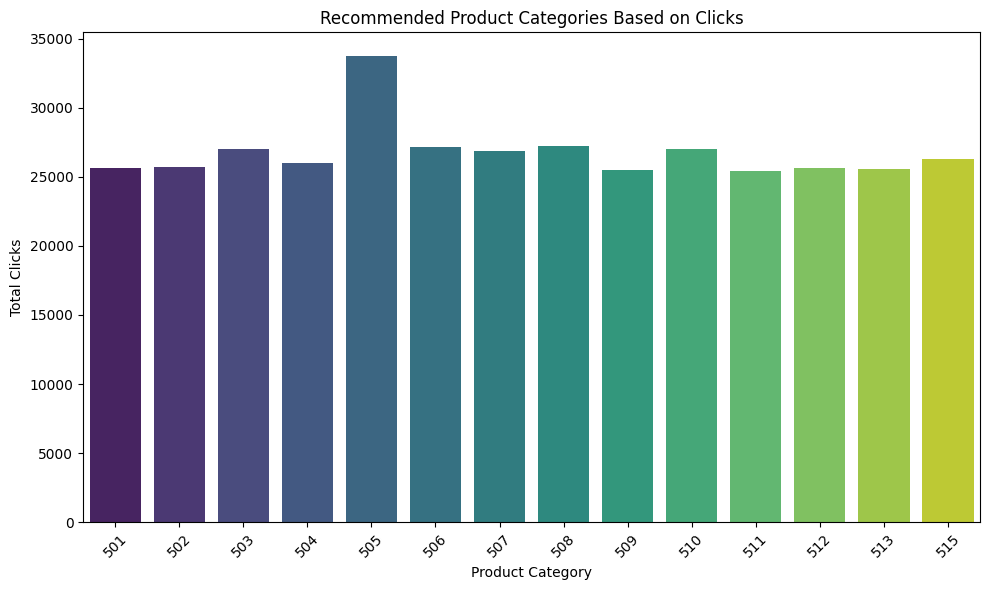

Not enough data to make predictions for Customer ID: 38941.
Estimated spending per minute for Customer ID 38941: $446.81
Payment methods counts for Customer ID 38941:
payment_method
paypal    1
Name: count, dtype: int64


<ipython-input-26-ffbbf7e5ec52>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')


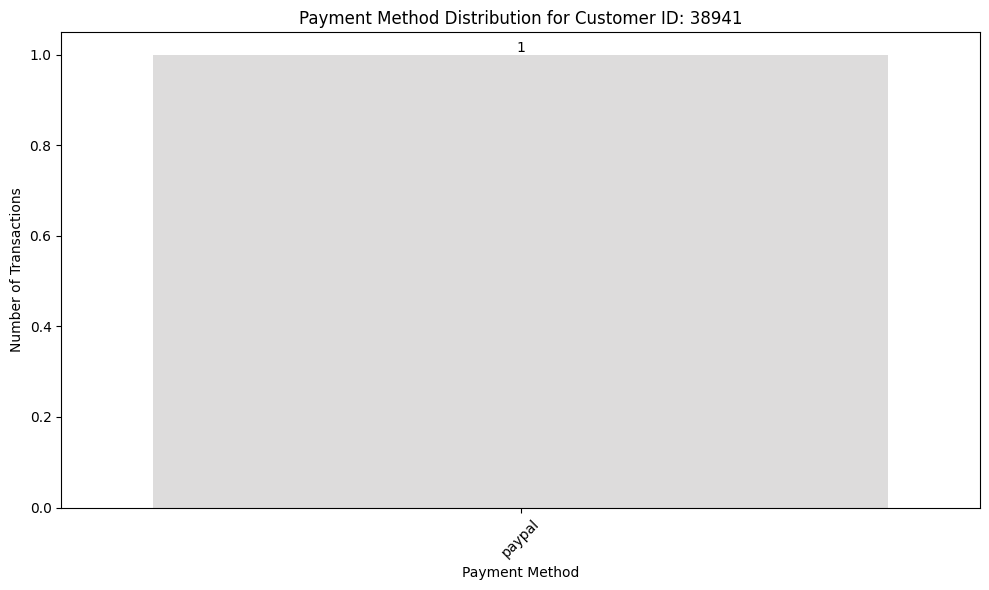

Consider targeting this customer with credit card ads.
Consider targeting this customer with PayPal ads.


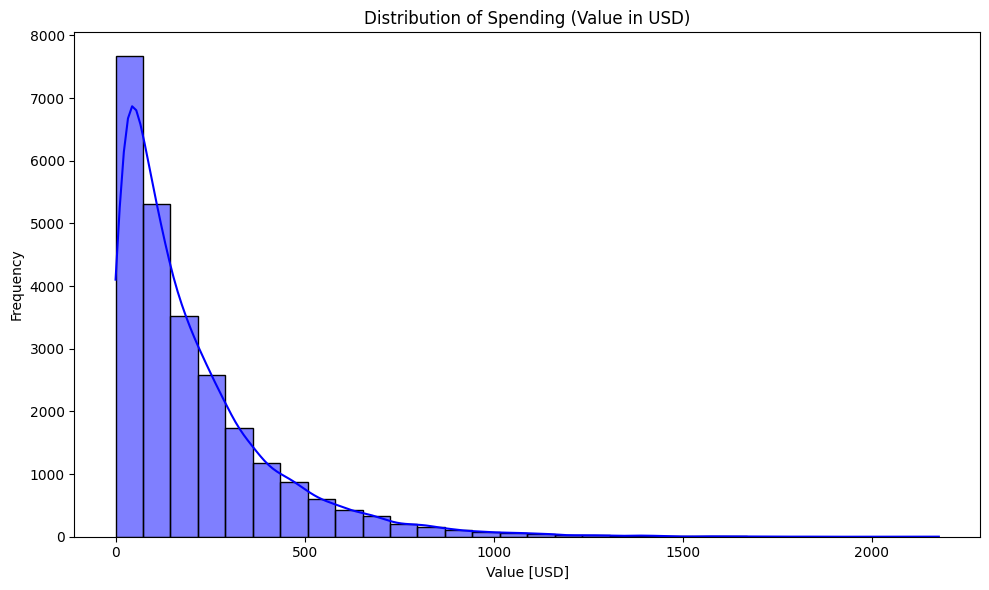

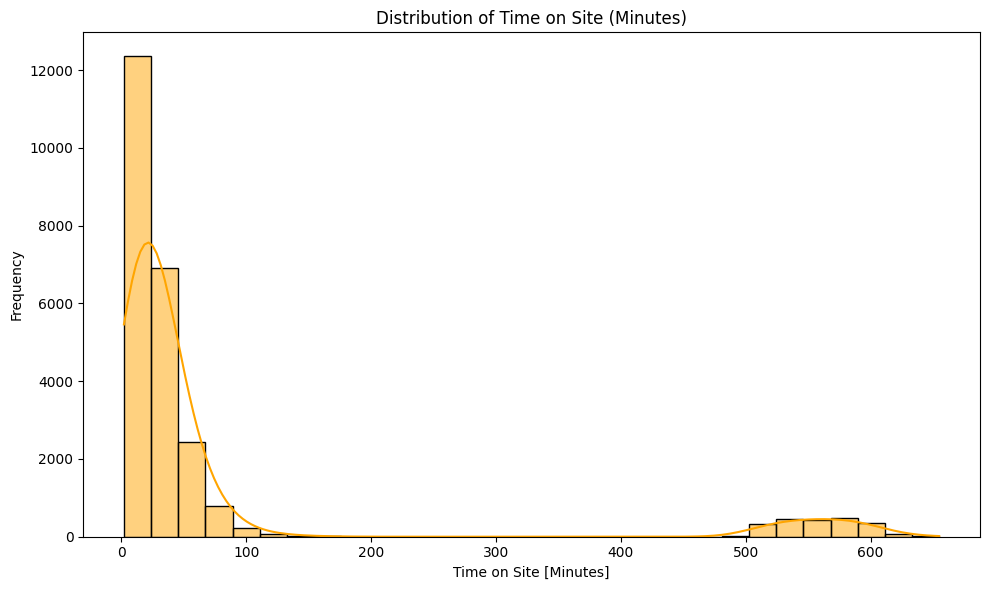

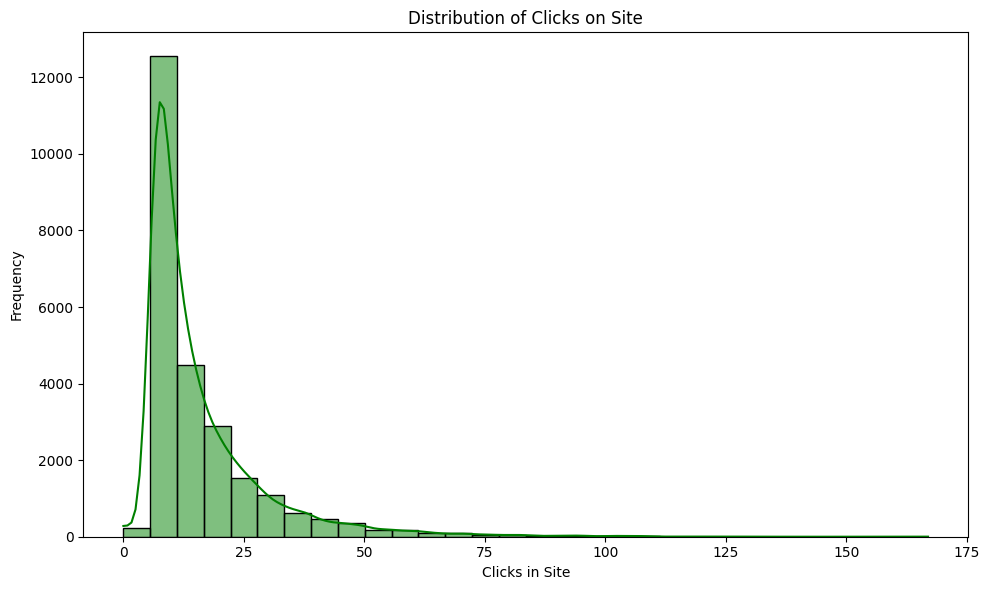

<ipython-input-26-ffbbf7e5ec52>:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


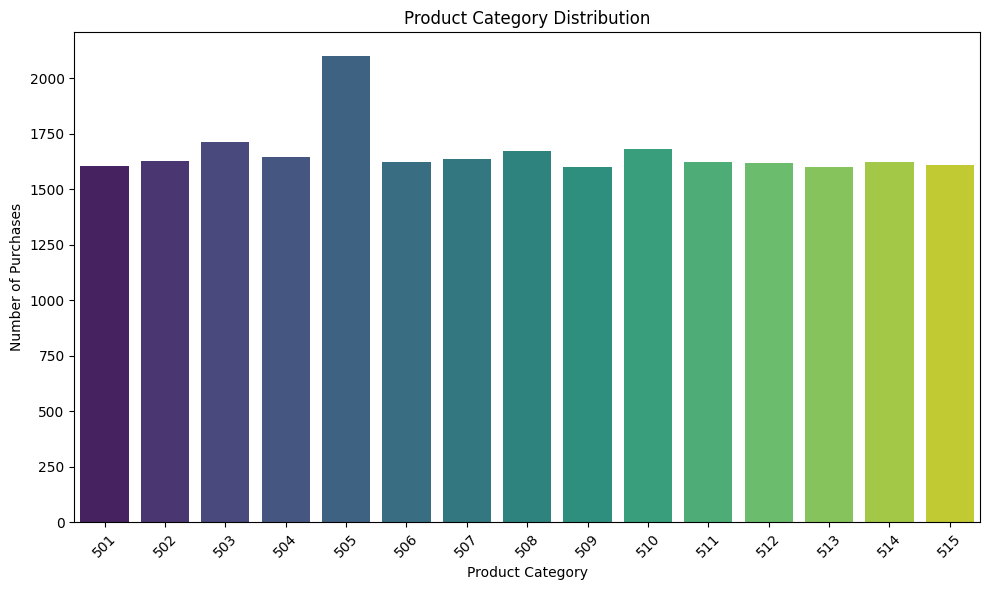

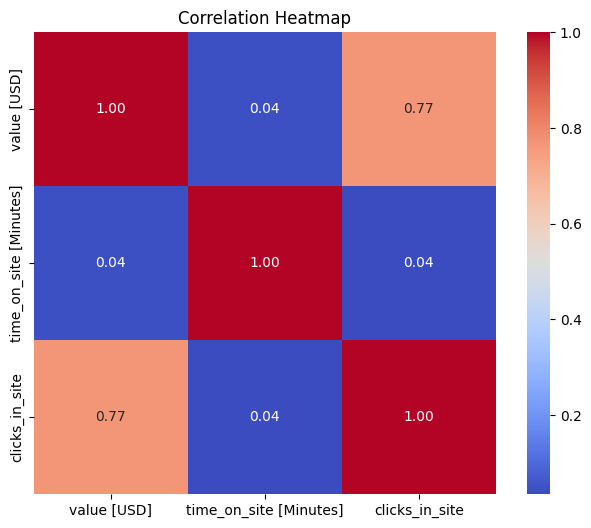

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # Updated import

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Inspect DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Prepare data for Prophet
    purchase_data = customer_data.groupby('date')['product_category'].count().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Check for valid data
    if purchase_data.shape[0] < 2:
        print(f"Not enough data to make predictions for Customer ID: {customer_id}.")
        return None

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

    return forecast  # Return the forecast data for further processing

def predict_spending(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Check if the required columns exist
    if 'value [USD]' not in df.columns or 'time_on_site [Minutes]' not in df.columns:
        print("Required columns 'value [USD]' or 'time_on_site [Minutes]' are missing in the DataFrame.")
        return None

    # Calculate total spending and time spent
    total_spending = customer_data['value [USD]'].sum()  # Using the correct column name
    total_time_on_site = customer_data['time_on_site [Minutes]'].sum()  # Using the correct column name

    # Average spending per minute on site
    average_spending_per_time = total_spending / (total_time_on_site / 60) if total_time_on_site > 0 else 0

    print(f"Estimated spending per minute for Customer ID {customer_id}: ${average_spending_per_time:.2f}")
    return average_spending_per_time

def analyze_payment_method(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Analyze payment methods used by the customer
    payment_methods = customer_data['payment_method'].value_counts()

    # Print payment methods counts for debugging
    print(f"Payment methods counts for Customer ID {customer_id}:")
    print(payment_methods)

    if payment_methods.empty:
        print("No payment methods found for this customer.")
        return None

    # Plot payment method distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='coolwarm')
    plt.title(f'Payment Method Distribution for Customer ID: {customer_id}')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)

    # Adding data labels on bars
    for index, value in enumerate(payment_methods.values):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    credit_card_used = payment_methods.get('Credit Card', 0)
    paypal_used = payment_methods.get('PayPal', 0)

    # Determine if the customer might benefit from ads
    if credit_card_used == 0:
        print("Consider targeting this customer with credit card ads.")
    if paypal_used == 0:
        print("Consider targeting this customer with PayPal ads.")

# Additional Analysis Functions
def plot_value_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['value [USD]'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Spending (Value in USD)')
    plt.xlabel('Value [USD]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_time_on_site_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['time_on_site [Minutes]'], bins=30, kde=True, color='orange')
    plt.title('Distribution of Time on Site (Minutes)')
    plt.xlabel('Time on Site [Minutes]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_clicks_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['clicks_in_site'], bins=30, kde=True, color='green')
    plt.title('Distribution of Clicks on Site')
    plt.xlabel('Clicks in Site')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_product_category_distribution(df):
    category_counts = df['product_category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title('Product Category Distribution')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df[['value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']]
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations and predictions: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)

        # Predict future purchases
        forecast = future_purchase_prediction(df, customer_id)

        # Add spending prediction
        estimated_spending = predict_spending(df, customer_id)

        # Analyze payment methods
        analyze_payment_method(df, customer_id)

        # Additional Graphs
        plot_value_distribution(df)
        plot_time_on_site_distribution(df)
        plot_clicks_distribution(df)
        plot_product_category_distribution(df)
        plot_correlation_heatmap(df)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


#**Final Code**

Data Preview:
         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
Columns in DataFrame:
Index(['date', 'customer_id', 'product_category', 'payment_method',
       'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site',
       'Unnamed: 7'],
      dtype='ob

<ipython-input-11-11f6ba23cbcc>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')


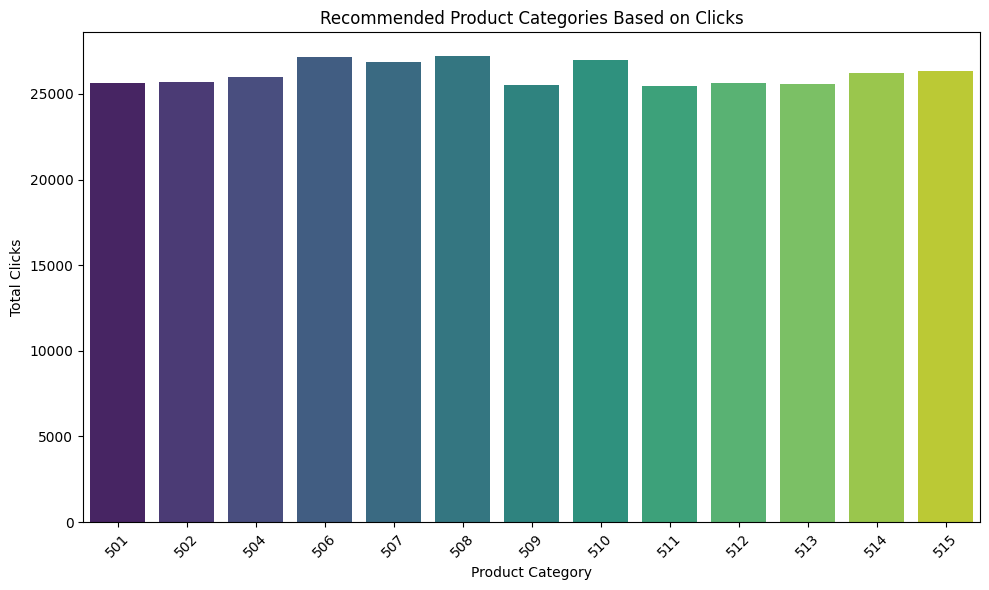

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


<Figure size 1000x600 with 0 Axes>

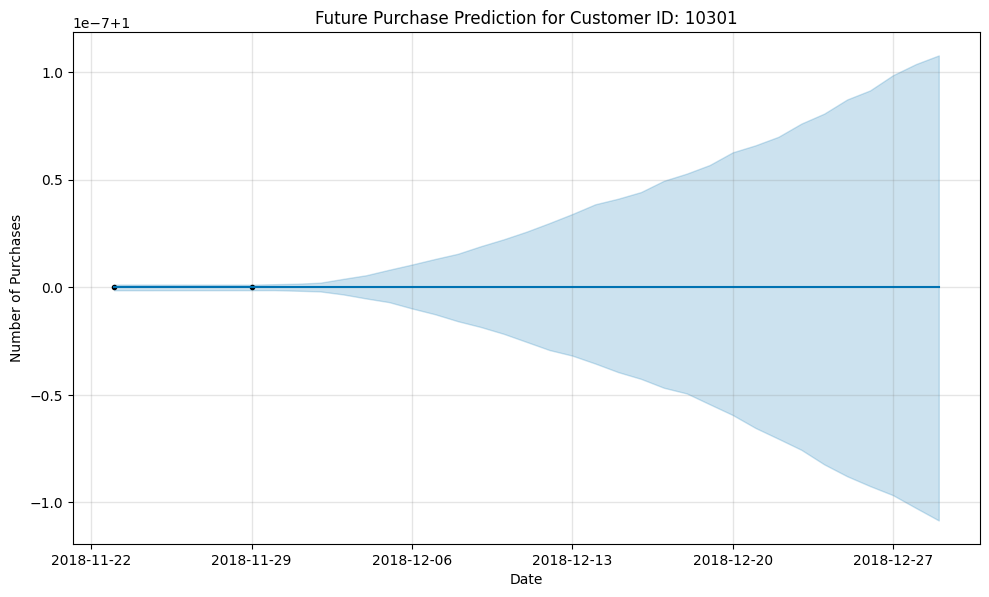

Estimated spending per minute for Customer ID 10301: $304.66
Payment methods counts for Customer ID 10301:
payment_method
credit    2
Name: count, dtype: int64


<ipython-input-11-11f6ba23cbcc>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set2')  # Changed palette to Set2


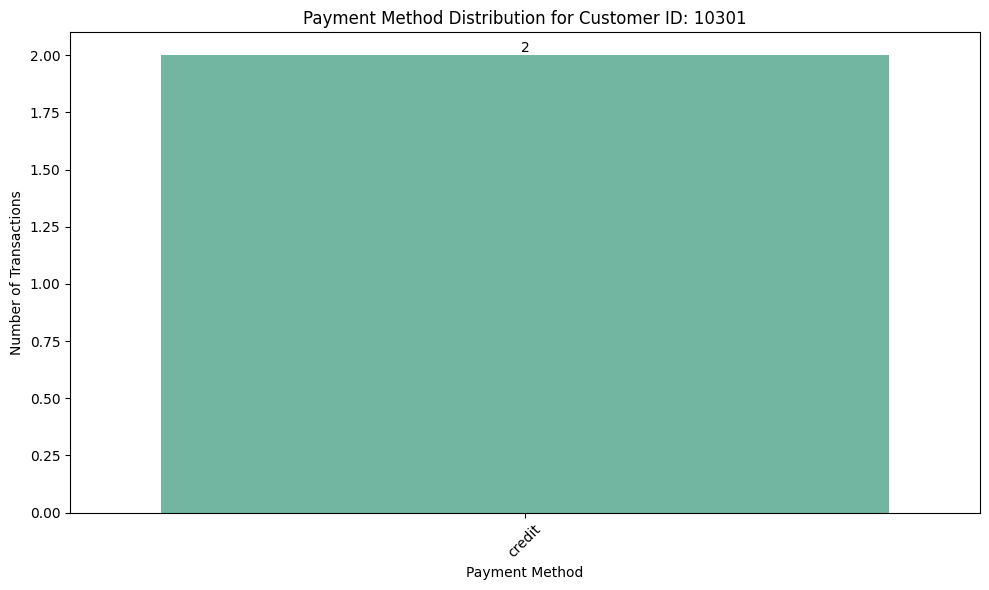

Consider targeting this customer with credit card ads.
Consider targeting this customer with PayPal ads.


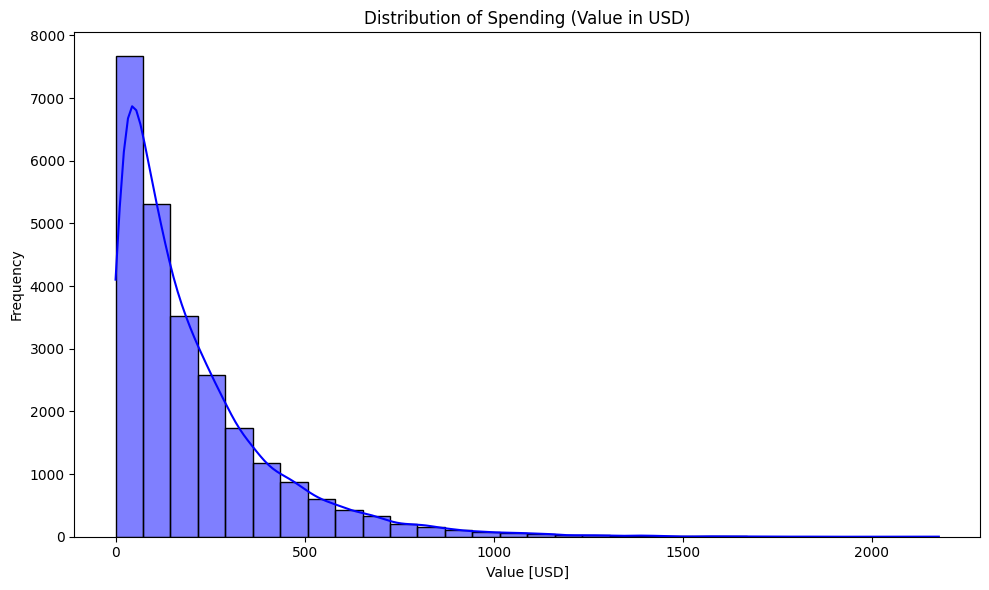

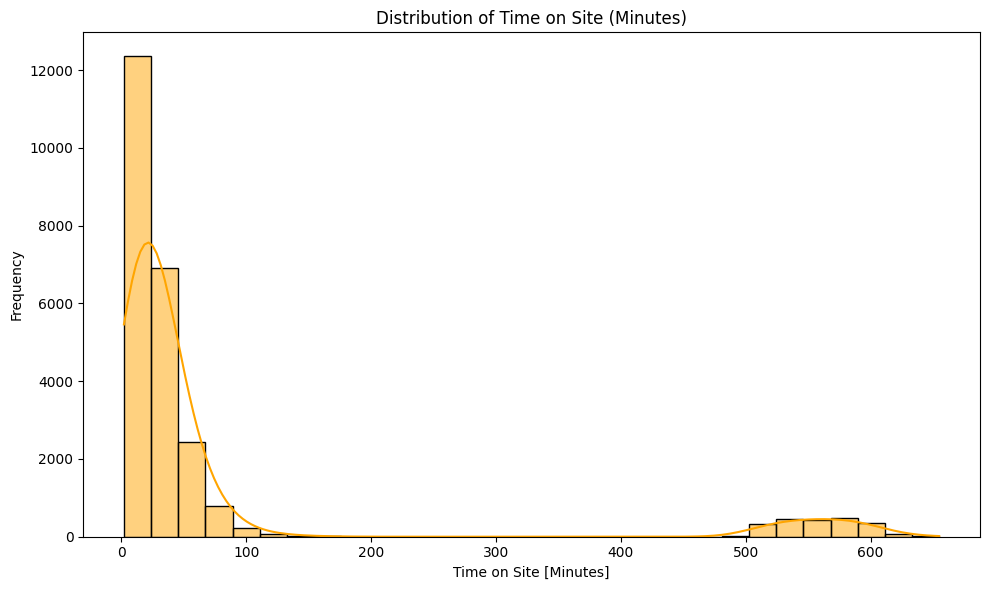

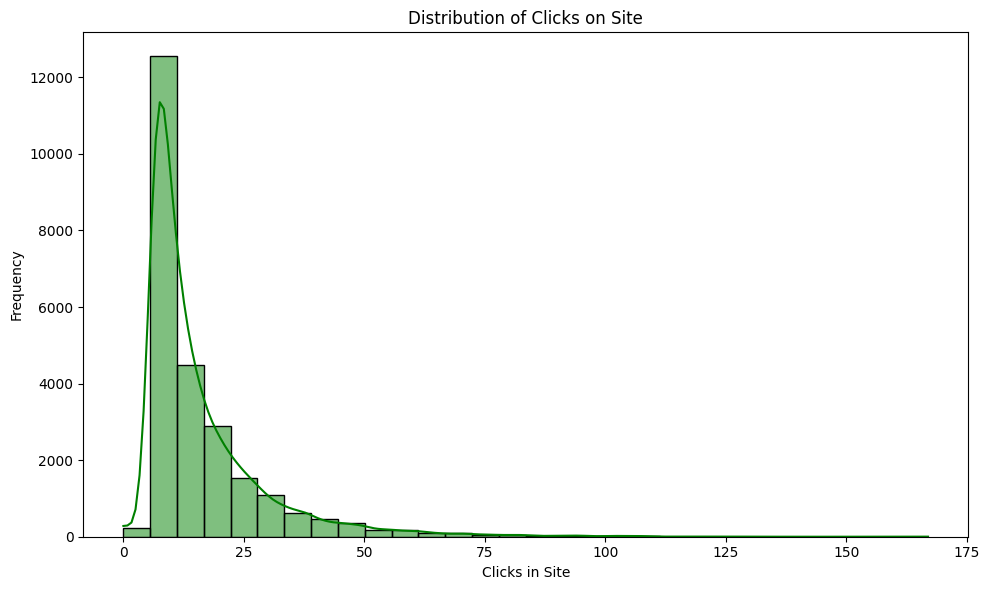

<ipython-input-11-11f6ba23cbcc>:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


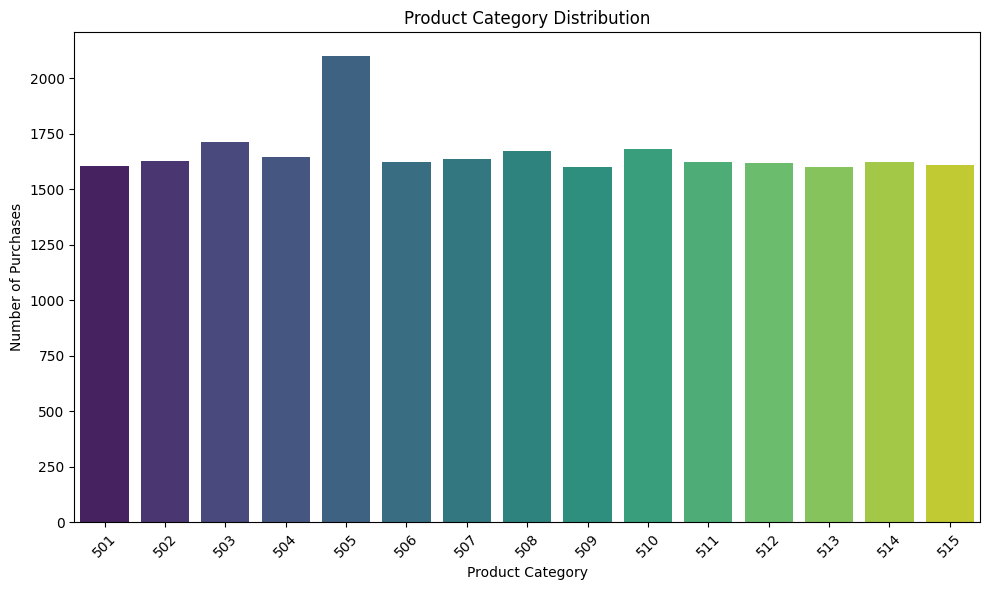

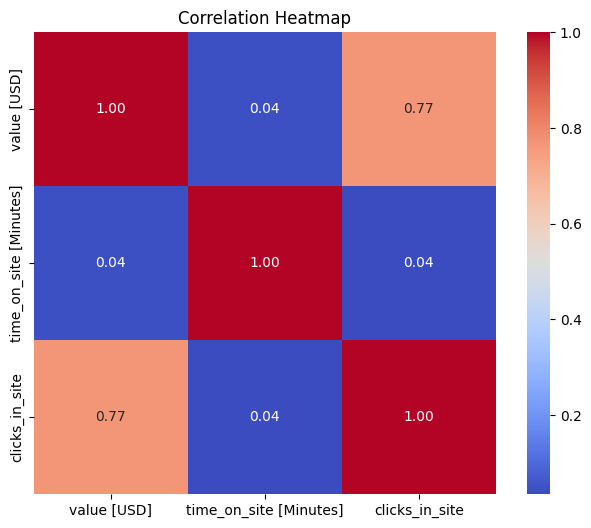

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # Updated import

# Load the data from the CSV file
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Inspect DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['product_category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['product_category'].isin(interacted_categories)]

    # Aggregate clicks by product category
    category_clicks = filtered_data.groupby('product_category')['clicks_in_site'].sum().reset_index()

    # Sort categories by clicks in descending order
    recommended_categories = category_clicks.sort_values(by='clicks_in_site', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='product_category', y='clicks_in_site', palette='viridis')
        plt.title('Recommended Product Categories Based on Clicks')
        plt.xlabel('Product Category')
        plt.ylabel('Total Clicks')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Prepare data for Prophet
    purchase_data = customer_data.groupby('date')['product_category'].count().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Check for valid data
    if purchase_data.shape[0] < 2:
        print(f"Not enough data to make predictions for Customer ID: {customer_id}.")
        return None

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

    return forecast  # Return the forecast data for further processing

def predict_spending(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Check if the required columns exist
    if 'value [USD]' not in df.columns or 'time_on_site [Minutes]' not in df.columns:
        print("Required columns 'value [USD]' or 'time_on_site [Minutes]' are missing in the DataFrame.")
        return None

    # Calculate total spending and time spent
    total_spending = customer_data['value [USD]'].sum()  # Using the correct column name
    total_time_on_site = customer_data['time_on_site [Minutes]'].sum()  # Using the correct column name

    # Average spending per minute on site
    average_spending_per_time = total_spending / (total_time_on_site / 60) if total_time_on_site > 0 else 0

    print(f"Estimated spending per minute for Customer ID {customer_id}: ${average_spending_per_time:.2f}")
    return average_spending_per_time

def analyze_payment_method(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Analyze payment methods used by the customer
    payment_methods = customer_data['payment_method'].value_counts()

    # Print payment methods counts for debugging
    print(f"Payment methods counts for Customer ID {customer_id}:")
    print(payment_methods)

    if payment_methods.empty:
        print("No payment methods found for this customer.")
        return None

    # Plot payment method distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set2')  # Changed palette to Set2
    plt.title(f'Payment Method Distribution for Customer ID: {customer_id}')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)

    # Adding data labels on bars
    for index, value in enumerate(payment_methods.values):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    credit_card_used = payment_methods.get('Credit Card', 0)
    paypal_used = payment_methods.get('PayPal', 0)

    # Determine if the customer might benefit from ads
    if credit_card_used == 0:
        print("Consider targeting this customer with credit card ads.")
    if paypal_used == 0:
        print("Consider targeting this customer with PayPal ads.")

# Additional Analysis Functions
def plot_value_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['value [USD]'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Spending (Value in USD)')
    plt.xlabel('Value [USD]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_time_on_site_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['time_on_site [Minutes]'], bins=30, kde=True, color='orange')
    plt.title('Distribution of Time on Site (Minutes)')
    plt.xlabel('Time on Site [Minutes]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_clicks_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['clicks_in_site'], bins=30, kde=True, color='green')
    plt.title('Distribution of Clicks on Site')
    plt.xlabel('Clicks in Site')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_product_category_distribution(df):
    category_counts = df['product_category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title('Product Category Distribution')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df[['value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']]
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Get user input for customer ID
try:
    customer_id = int(input("Enter Customer ID to get recommendations and predictions: "))
    recommendations = recommend_product_categories(df, customer_id)

    if recommendations is not None and not recommendations.empty:
        print("\nRecommended Product Categories based on clicks:")
        print(recommendations)

        # Plot the recommendations
        plot_recommendations(recommendations)

        # Predict future purchases
        forecast = future_purchase_prediction(df, customer_id)

        # Add spending prediction
        estimated_spending = predict_spending(df, customer_id)

        # Analyze payment methods
        analyze_payment_method(df, customer_id)

        # Additional Graphs
        plot_value_distribution(df)
        plot_time_on_site_distribution(df)
        plot_clicks_distribution(df)
        plot_product_category_distribution(df)
        plot_correlation_heatmap(df)
    else:
        print("No recommendations available.")
except ValueError:
    print("Please enter a valid customer ID.")


# **Final new**

